# Delivery Task
Axel Lie - Data Scientist Test for MileApp

## import the needed library

In [1]:
import datetime

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os

df = pd.read_json('data-sample.json')

cek bentukan datanya seperti apa, ternyata ada beberapa column yang berisikan dictionary yang harus dipecah

In [3]:
df.head()

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."


# Data Cleaning 

jika dilihat ada beberapa data yang masih null dan juga kita akan merapihkan/memecahkan dictionary dari column cod dan UserVar menjadi column tunggal di dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   taskLocationDone   7566 non-null   object
 1   taskCreatedTime    8334 non-null   object
 2   cod                2358 non-null   object
 3   taskAssignedTo     8333 non-null   object
 4   taskCompletedTime  7566 non-null   object
 5   taskStatus         8334 non-null   object
 6   flow               8334 non-null   object
 7   taskId             8334 non-null   object
 8   UserVar            8334 non-null   object
dtypes: object(9)
memory usage: 586.1+ KB


In [5]:
df.isna().sum()

taskLocationDone      768
taskCreatedTime         0
cod                  5976
taskAssignedTo          1
taskCompletedTime     768
taskStatus              0
flow                    0
taskId                  0
UserVar                 0
dtype: int64

jika dilihat ada banyak null values dari cod (saya akan asumsikan jika data cod nya null maka task tersebut tidak dilakukan menggunakan fitur cod)

In [6]:
df.cod

0        {'amount': 685000, 'received': True}
1         {'amount': 53500, 'received': True}
2        {'amount': 179500, 'received': True}
3         {'amount': 31815, 'received': True}
4        {'amount': 144562, 'received': True}
                        ...                  
8329                                      NaN
8330                                      NaN
8331                                      NaN
8332    {'amount': 151000, 'received': False}
8333                                      NaN
Name: cod, Length: 8334, dtype: object

saya memecah null value dari cod menjadi amount null dan received null agar dapat dijadikan dataframe

In [7]:
df.cod.loc[df.cod.isnull()] = df.cod.loc[df.cod.isnull()].apply(lambda x:{'amount' : np.nan, 'received' : np.nan})

In [8]:
df.cod

0        {'amount': 685000, 'received': True}
1         {'amount': 53500, 'received': True}
2        {'amount': 179500, 'received': True}
3         {'amount': 31815, 'received': True}
4        {'amount': 144562, 'received': True}
                        ...                  
8329         {'amount': nan, 'received': nan}
8330         {'amount': nan, 'received': nan}
8331         {'amount': nan, 'received': nan}
8332    {'amount': 151000, 'received': False}
8333         {'amount': nan, 'received': nan}
Name: cod, Length: 8334, dtype: object

In [9]:
df.isnull().sum()

taskLocationDone     768
taskCreatedTime        0
cod                    0
taskAssignedTo         1
taskCompletedTime    768
taskStatus             0
flow                   0
taskId                 0
UserVar                0
dtype: int64

merubah dictionary cod menjadi dataframe agar nantinya dapat digabungkan ke dalam dataframe utama

In [10]:
cod_df = pd.DataFrame.from_records(df.cod)
cod_df

,amount,received
0,685000.0,True
1,53500.0,True
2,179500.0,True
3,31815.0,True
4,144562.0,True
...,...,...
8329,NaN,NaN
8330,NaN,NaN
8331,NaN,NaN
8332,151000.0,False


merubah dictionary uservar menjadi dataframe agar nantinya dapat digabungkan ke dalam dataframe utama

In [11]:
User_df = pd.DataFrame.from_records(df.UserVar)
User_df

,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus
0,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
...,...,...,...,...,...,...,...,...
8329,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,COLF01
8330,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,TGR,COLF02
8331,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,COLF01
8332,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.6,CGK,COLF02


lalu saya akan drop dua column yang berisikan dictionary tersebut

In [12]:
df = df.drop(columns=['cod', 'UserVar'])

In [13]:
df.taskStatus.value_counts()

done       7572
ongoing     762
Name: taskStatus, dtype: int64

In [14]:
User_df.taskStatus.value_counts()

COLF01    5427
COLF02    2145
Name: taskStatus, dtype: int64

jika dilihat ada 2 column yang memiliki nama yang sama yaitu taskStatus namun memiliki arti berbeda, lalu jika dilihat ada column di UserVar yaitu "taskStatusLabel" yang memiliki value yang sama saja seperti taskStatus di dataframe utama yaitu COLF01 artinya success dan COLF02 artinya Failed.

In [15]:
User_df.taskStatusLabel.value_counts()

Success    5427
Failed     2145
Name: taskStatusLabel, dtype: int64

Maka saya akan membuang salah satu taskStatus agar tidak dobel

In [16]:
User_df = User_df.drop(columns=['taskStatus'])

menggabungkan semua dataframe yang telah terpecah tadi

In [17]:
result = pd.concat([df, User_df, cod_df], axis=1)

In [18]:
result

,taskLocationDone,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,amount,received
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,685000.0,True
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,53500.0,True
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}",2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,179500.0,True
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,31815.0,True
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,144562.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,"{'lon': 0, 'lat': 0}",2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,NaN,NaN
8330,"{'lon': 110.3520537, 'lat': -7.8925713}",2022-11-10 09:21:42 +0700,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,TGR,NaN,NaN
8331,"{'lon': 105.6648975, 'lat': -5.3590626}",2022-11-10 09:36:44 +0700,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,NaN,NaN
8332,"{'lon': 119.8771726, 'lat': -8.5133055}",2022-11-10 07:25:40 +0700,lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.6,CGK,151000.0,False


In [19]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   taskLocationDone       7566 non-null   object 
 1   taskCreatedTime        8334 non-null   object 
 2   taskAssignedTo         8333 non-null   object 
 3   taskCompletedTime      7566 non-null   object 
 4   taskStatus             8334 non-null   object 
 5   flow                   8334 non-null   object 
 6   taskId                 8334 non-null   object 
 7   branch_dest            8334 non-null   object 
 8   taskStatusLabel        7572 non-null   object 
 9   receiver_city          8282 non-null   object 
 10  taskDetailStatusLabel  7572 non-null   object 
 11  taskDetailStatus       7572 non-null   object 
 12  weight                 8334 non-null   object 
 13  branch_origin          8041 non-null   object 
 14  amount                 2358 non-null   float64
 15  rece

In [20]:
result.isnull().sum()

taskLocationDone          768
taskCreatedTime             0
taskAssignedTo              1
taskCompletedTime         768
taskStatus                  0
flow                        0
taskId                      0
branch_dest                 0
taskStatusLabel           762
receiver_city              52
taskDetailStatusLabel     762
taskDetailStatus          762
weight                      0
branch_origin             293
amount                   5976
received                 5976
dtype: int64

ada 1 null dari taskAssignedTo maka saya akan membuang row 1 data null tersebut 

In [21]:
result = result.dropna(subset=['taskAssignedTo'])
result = result.reset_index(drop=True)

In [22]:
result.isnull().sum()

taskLocationDone          767
taskCreatedTime             0
taskAssignedTo              0
taskCompletedTime         767
taskStatus                  0
flow                        0
taskId                      0
branch_dest                 0
taskStatusLabel           761
receiver_city              52
taskDetailStatusLabel     761
taskDetailStatus          761
weight                      0
branch_origin             293
amount                   5975
received                 5975
dtype: int64

ternyata saat dilihat status dari task nya ada 2 label yaitu done dan ongoing berarti dapat diasumsikan taskLocationDone, taskCompletedTime, taskStatusLabel, taskDetailStatusLabel, dan taskDetail Status bergantung kepada taskStatus dikarenakan jika task masih ongoing tidak mungkin ada tempat di mana task itu selesai, kapan task itu selesai, dan apakah task tersebut success atau failed.

In [23]:
result.taskStatus.value_counts()

done       7572
ongoing     761
Name: taskStatus, dtype: int64

lalu kita akan check mengapa taskLocationDone dan taskCompletedTime ada 767 null sedangkan yang ongoing hanya 761 task

In [24]:
nan_list = []

for i, x in enumerate(result['taskCompletedTime']):
    if x is np.nan and result.taskStatus.iloc[i] != 'ongoing':
        print(result.iloc[i])
        print()
        nan_list.append(i)

taskLocationDone                               NaN
taskCreatedTime          2022-11-01 15:04:06 +0700
taskAssignedTo                       mildCardinal0
taskCompletedTime                              NaN
taskStatus                                    done
flow                                      Delivery
taskId                        9779ae5b5f88ba0bf31c
branch_dest                                    BKI
taskStatusLabel                            Success
receiver_city                     BABELAN,CIKARANG
taskDetailStatusLabel            YANG BERSANGKUTAN
taskDetailStatus                               D01
weight                                           3
branch_origin                                  CGK
amount                                         NaN
received                                       NaN
Name: 550, dtype: object

taskLocationDone                               NaN
taskCreatedTime          2022-11-01 16:59:58 +0700
taskAssignedTo                       mildCardinal0
taskC

jika dilihat data yang taskStatus nya sudah selesai (done) tetapi tidak ada taskCompletedTiem dan taskLocationDone nya semua dikerjakan oleh mildCardinal0 dan semua pengirimannya sama ke BABELAN, CIKARANG

lalu kita akan cek apakah task lain yang dikerjakan oleh mildCardinal0 

In [25]:
result[result.taskAssignedTo == 'mildCardinal0']

,taskLocationDone,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,amount,received
550,NaN,2022-11-01 15:04:06 +0700,mildCardinal0,NaN,done,Delivery,9779ae5b5f88ba0bf31c,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,3,CGK,NaN,NaN
551,NaN,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,8ade827b1e3530c02e82,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,4.9,CGK,NaN,NaN
552,NaN,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,292b1e9f73099dac1209,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,8,CGK,NaN,NaN
553,NaN,2022-11-01 16:59:58 +0700,mildCardinal0,NaN,done,Delivery,7e8862b3f4010465f006,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,17,BDO,NaN,NaN
554,NaN,2022-11-01 10:13:02 +0700,mildCardinal0,NaN,done,Delivery,a4fb8aed363abc3d6af3,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,1,CGK,NaN,NaN
555,NaN,2022-11-01 10:13:03 +0700,mildCardinal0,NaN,done,Delivery,38e5d762840ec39984b1,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,1,BTJ,NaN,NaN


jika dilihat mildCardinal0 hanya mengerjakan 6 anomali task tersebut (task yang done tapi tidak memiliki locationDone dan completedTime)

In [26]:
print(len(nan_list))
nan_list

6


[550, 551, 552, 553, 554, 555]

maka saya akan drop 6 data tersebut karena memberikan anomali terhadap keseluruhan data dan menjadi pertanyaan kenapa sudah done tapi tidak ada waktu selesai dan tempat selesai

In [27]:
result.drop(nan_list, inplace=True)
result = result.reset_index(drop=True)

In [28]:
result.taskStatus.value_counts()

done       7566
ongoing     761
Name: taskStatus, dtype: int64

In [29]:
result.isnull().sum()

taskLocationDone          761
taskCreatedTime             0
taskAssignedTo              0
taskCompletedTime         761
taskStatus                  0
flow                        0
taskId                      0
branch_dest                 0
taskStatusLabel           761
receiver_city              52
taskDetailStatusLabel     761
taskDetailStatus          761
weight                      0
branch_origin             293
amount                   5969
received                 5969
dtype: int64

jika dilihat sudah sesuai ada 761 data yang ongoing dan 761 data taskLocationDone dan taskCompletedTime yang null

lalu masih ada 293 data branch origin yang null, kita akan check mengapa data tersebut null

In [30]:
result[result.branch_origin.isnull()]

,taskLocationDone,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,amount,received
11,"{'lon': 109.7803235, 'lat': -7.6637309}",2022-11-01 09:13:16 +0700,giddyCockatoo1,2022-11-01 15:39:01 +0700,done,Delivery,dcaeb71079c4d71f6008,MGL,Success,"BUTUH,PURWOREJO",YANG BERSANGKUTAN,D01,1,None,148000.0,True
243,"{'lon': 100.1434608, 'lat': -0.6211384}",2022-11-01 16:09:43 +0700,dreadfulDinosaur9,2022-11-01 16:10:49 +0700,done,Delivery,9acb3d268b1169a5c6b6,PDG,Success,"BATANG ANAI,PARIAMAN",YANG BERSANGKUTAN,D01,10,None,111000.0,True
314,"{'lon': 112.1660782, 'lat': -8.0931781}",2022-11-01 09:16:59 +0700,jealousLemur3,2022-11-01 10:51:20 +0700,done,Delivery,3447ea4a5c533bcbaa7b,MXG,Success,"KEPANJENKIDUL,BLITAR",YANG BERSANGKUTAN,D01,1,None,23000.0,True
332,"{'lon': 97.8200188, 'lat': 0.5638875999999999}",2022-11-01 18:35:17 +0700,finickyWasp0,2022-11-01 18:36:08 +0700,done,Delivery,d927638d08febd1d77de,DTB,Success,"TELUK DALAM,KAB.NIAS",YANG BERSANGKUTAN,D01,1,None,46000.0,True
415,"{'lon': 100.7501275, 'lat': -1.0554788}",2022-11-01 11:21:12 +0700,pacifiedChowder4,2022-11-01 13:46:25 +0700,done,Delivery,8bace4a1c45648ef94e0,PDG,Success,"DANAU KEMBAR,SOLOK",YANG BERSANGKUTAN,D01,1,None,172000.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8277,"{'lon': 116.1922096, 'lat': -1.8986021}",2022-11-10 08:16:34 +0700,dreadfulAntelope7,2022-11-10 10:38:02 +0800,done,Delivery,a8198c4db9bcaf0da8a9,BPN,Success,"TANAH GROGOT, KAB PA",YANG BERSANGKUTAN,D01,5,None,NaN,NaN
8281,"{'lon': 0, 'lat': 0}",2022-11-10 09:15:43 +0700,cheerfulUnicorn8,2022-11-10 09:38:09 +0700,done,Delivery,48100108bc553e77e8d5,PKY,Success,"GUNUNG MAS,KUALAKURU",YANG BERSANGKUTAN,D01,4,None,NaN,NaN
8305,"{'lon': 0, 'lat': 0}",2022-11-10 07:46:14 +0700,emptyPretzels3,2022-11-10 09:37:50 +0700,done,Delivery,60731ae4c9f801f84683,CGK,Success,"TANAH ABANG,JAKARTA",RECEPTIONIST,D02,0.12,None,NaN,NaN
8306,"{'lon': 0, 'lat': 0}",2022-11-10 07:39:33 +0700,jumpyGelding4,2022-11-10 09:37:59 +0700,done,Delivery,521a615ac21db9f5c862,PLM,Success,"ALANG-ALANG LEBAR,PA",KELUARGA/SAUDARA,D09,1,None,NaN,NaN


jika dilihat tidak ada alasan mengapa branch origin code nya null (maka saya akan drop branch origin tersebut)

In [31]:
result.dropna(subset=['branch_origin'], inplace=True)
result = result.reset_index(drop=True)

In [32]:
result.isnull().sum()

taskLocationDone          747
taskCreatedTime             0
taskAssignedTo              0
taskCompletedTime         747
taskStatus                  0
flow                        0
taskId                      0
branch_dest                 0
taskStatusLabel           747
receiver_city              49
taskDetailStatusLabel     747
taskDetailStatus          747
weight                      0
branch_origin               0
amount                   5710
received                 5710
dtype: int64

In [33]:
result[result.receiver_city.isnull()]

,taskLocationDone,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,amount,received
418,"{'lon': 109.2984622, 'lat': -6.8774052}",2022-11-01 10:10:31 +0700,blissfulSardines3,2022-11-01 11:14:59 +0700,done,Delivery,f954a152e95758c706f8,TGL,Success,None,YANG BERSANGKUTAN,D01,7.08,CGK,434502.0,True
1341,"{'lon': 116.6738854, 'lat': 3.656859}",2022-11-02 07:44:49 +0700,grumpyOcelot8,2022-11-02 08:47:04 +0800,done,Delivery,7559bd21e97a40a67bc4,TRK,Failed,None,RUMAH service/ KANTOR KOSONG (MASIH DIHUNI),U05,1,CGK,NaN,NaN
2017,"{'lon': 121.2808432, 'lat': -2.5843271}",2022-11-03 08:07:09 +0700,needyMallard2,2022-11-03 09:12:36 +0800,done,Delivery,1e2913f6d5c8e42a3341,UPG,Success,None,YANG BERSANGKUTAN,D01,1,CGK,NaN,NaN
2198,"{'lon': 123.6034124, 'lat': -10.1809953}",2022-11-03 07:22:50 +0700,needyDotterel6,2022-11-03 09:21:20 +0800,done,Delivery,a84f763501ed9577bfb0,KOE,Success,None,ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,KOE,NaN,NaN
2270,"{'lon': 123.6236968, 'lat': -10.1469795}",2022-11-03 07:34:02 +0700,finickyApples4,2022-11-03 09:20:49 +0800,done,Delivery,d9793b6e791064f40e5d,KOE,Failed,None,PENERIMA TIDAK DIKENAL,U02,1,KOE,NaN,NaN
2271,"{'lon': 123.6236968, 'lat': -10.1469795}",2022-11-03 07:34:02 +0700,finickyApples4,2022-11-03 09:20:49 +0800,done,Delivery,145df4a7628ff8f4e9ef,KOE,Failed,None,PENERIMA TIDAK DIKENAL,U02,1,KOE,NaN,NaN
2413,"{'lon': 0, 'lat': 0}",2022-11-03 07:04:32 +0700,innocentDinosaur7,2022-11-03 09:19:50 +0800,done,Delivery,db9bdc965dfb5725fd54,KOE,Success,None,YANG BERSANGKUTAN,D01,1,KOE,NaN,NaN
2736,"{'lon': 108.5155027, 'lat': -6.7503768}",2022-11-04 10:53:46 +0700,wakefulHawk6,2022-11-04 13:58:06 +0700,done,Delivery,4a6edbd8615cbbfc2ff5,CBN,Success,None,YANG BERSANGKUTAN,D01,1,CGK,NaN,NaN
3037,"{'lon': 106.0539102, 'lat': -5.8869381}",2022-11-04 09:03:04 +0700,soreTomatoe9,2022-11-04 13:59:39 +0700,done,Delivery,f16da985ce3f05f232bb,CLG,Success,None,YANG BERSANGKUTAN,D01,1,CLG,NaN,NaN
3115,"{'lon': 106.9555298, 'lat': -6.3135768}",2022-11-04 11:25:17 +0700,debonairCheetah0,2022-11-04 13:51:55 +0700,done,Delivery,2d3bf939071fc0a4ebf7,BKI,Success,None,ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,NaN,NaN


jika dilihat receiver city juga sama memiliki null value padahal ada branch destination codenya, maka saya akan drop 49 data null value ini juga

In [34]:
result.dropna(subset=['receiver_city'], inplace=True)
result = result.reset_index(drop=True)

In [35]:
result.isnull().sum()

taskLocationDone          741
taskCreatedTime             0
taskAssignedTo              0
taskCompletedTime         741
taskStatus                  0
flow                        0
taskId                      0
branch_dest                 0
taskStatusLabel           741
receiver_city               0
taskDetailStatusLabel     741
taskDetailStatus          741
weight                      0
branch_origin               0
amount                   5664
received                 5664
dtype: int64

dapat dilihat berarti sisa yang masih null yaitu 741 berarti ada 741 task yang masih ongoing/belum selesai (jadi saya tidak akan drop null value tersebut karena mereka memiliki arti)

dan juga ada 5664 task yang tidak menggunakan fitur cod

In [36]:
result.head()

,taskLocationDone,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,amount,received
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,685000.0,True
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,53500.0,True
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}",2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,179500.0,True
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,31815.0,True
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,144562.0,True


In [37]:
result.flow.value_counts()

Delivery    7985
Name: flow, dtype: int64

In [38]:
result.taskDetailStatus.value_counts()

D01    2963
D09     742
U12     735
D10     606
D04     525
U01     315
U05     298
CR6     243
CR3      99
D06      89
D02      81
U09      69
D07      60
U02      59
D05      58
U06      51
U08      45
U03      44
U10      39
U25      27
CR5      23
D08      19
U21      16
U22      12
D11      10
D12       6
D03       3
U07       3
U24       2
U13       1
U11       1
Name: taskDetailStatus, dtype: int64

In [39]:
result[result.taskDetailStatus == 'D01']

,taskLocationDone,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,amount,received
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,685000.0,True
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,53500.0,True
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}",2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,179500.0,True
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,31815.0,True
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,144562.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7973,"{'lon': 107.6944467, 'lat': -6.9244567}",2022-11-10 08:13:30 +0700,humorousPiglet8,2022-11-10 09:38:02 +0700,done,Delivery,85f340c19c6cffd3135e,BDO,Success,"UJUNGBERUNG, BANDUNG",YANG BERSANGKUTAN,D01,54.8,CGK,NaN,NaN
7976,"{'lon': 0, 'lat': 0}",2022-11-10 08:23:41 +0700,ferventBoa6,2022-11-10 09:38:02 +0700,done,Delivery,a51606c83f1f0d64fbdb,DJB,Success,"DENDANG,MUARASABAK",YANG BERSANGKUTAN,D01,2,CGK,NaN,NaN
7977,"{'lon': 0, 'lat': 0}",2022-11-10 08:37:54 +0700,gutturalLapwing2,2022-11-10 09:38:03 +0700,done,Delivery,ae9cb5cfa113db947621,DPK,Success,"SUKMAJAYA,DEPOK",YANG BERSANGKUTAN,D01,4.08,CGK,NaN,NaN
7978,"{'lon': 101.4386635, 'lat': 0.47958000000000006}",2022-11-10 07:27:51 +0700,dearWhiting2,2022-11-10 09:38:02 +0700,done,Delivery,4df98016923e193d39ec,PKU,Success,"MARPOYAN DAMAI, PEKA",YANG BERSANGKUTAN,D01,1,CGK,NaN,NaN


lalu saya juga akan membuang column yang tidak diperlukan seperti taskLocationDone, flow (dikarenakan semuanya delivery)dan taskId(karena id semuanya unique), taskDetailStatus (dikarenakan artinya sama dengan taskDetailStatusLabel)

In [40]:
result = result.drop(columns=['taskLocationDone', 'flow', 'taskId', 'taskDetailStatus'])

In [41]:
result

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,weight,branch_origin,amount,received
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,13,CGK,685000.0,True
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,1.3,CGK,53500.0,True
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,3,CGK,179500.0,True
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,0.625,CGK,31815.0,True
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,3,CGK,144562.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7980,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,1,CGK,NaN,NaN
7981,2022-11-10 09:21:42 +0700,murkyThrushe3,2022-11-10 09:37:52 +0700,done,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,1,TGR,NaN,NaN
7982,2022-11-10 09:36:44 +0700,enragedCake7,2022-11-10 09:37:55 +0700,done,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,1.44,CGK,NaN,NaN
7983,2022-11-10 07:25:40 +0700,lyingPaella2,2022-11-10 10:37:53 +0800,done,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,0.6,CGK,151000.0,False


## Exploratory Data Analysis

jika dicheck data ini dari tanggal 1 November 2022 sampai 10 November 2022

In [42]:
result['taskCreatedTime'] = pd.to_datetime(result['taskCreatedTime'])
result['taskCompletedTime'] = pd.to_datetime(result['taskCompletedTime'])

print(result['taskCreatedTime'].min())
print(result['taskCreatedTime'].max())

2022-11-01 07:24:04+07:00
2022-11-10 09:36:57+07:00


berarti ada total sampai 10 hari di data tersebut

In [43]:
total_days = result['taskCreatedTime'].max() - result['taskCreatedTime'].min()
total_days

Timedelta('9 days 02:12:53')

### taskStatusLabel

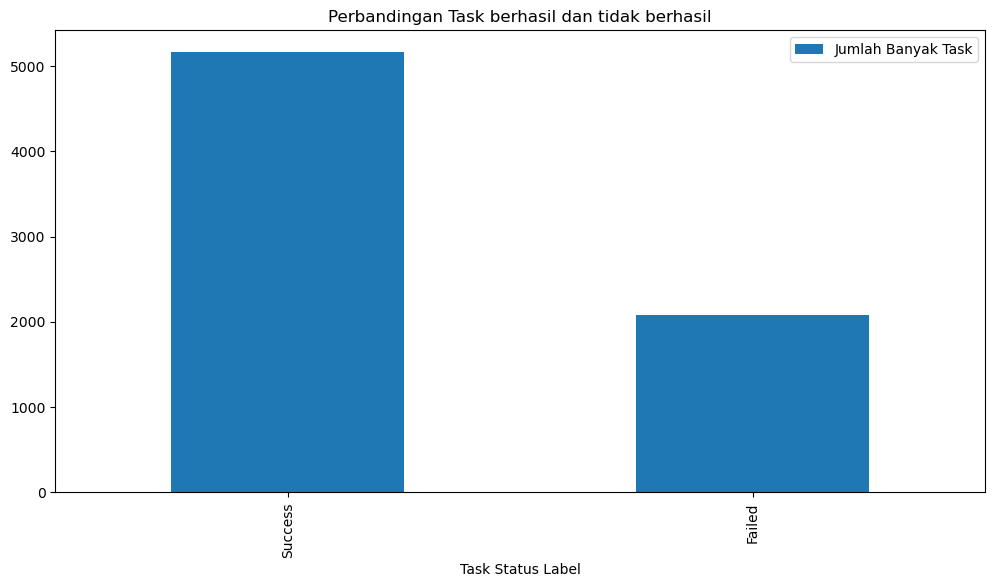

In [44]:
plt.figure(figsize=(12,6))
result['taskStatusLabel'].value_counts().plot.bar()
plt.title('Perbandingan Task berhasil dan tidak berhasil')
plt.xlabel('Task Status Label')
plt.legend(['Jumlah Banyak Task'])
plt.show()

jika dilihat lumayan banyak task yang tidak berhasil sekitar 2000lebih namun juga ada banyak task yang berhasil sekitar 5000 lebih

### TaskStatus

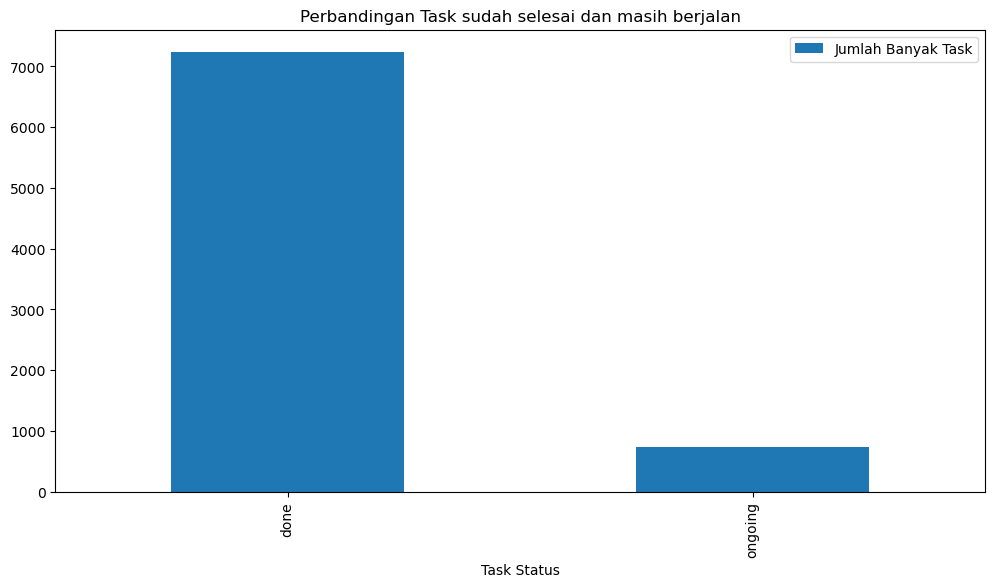

In [45]:
plt.figure(figsize=(12,6))
result['taskStatus'].value_counts().plot.bar()
plt.title('Perbandingan Task sudah selesai dan masih berjalan')
plt.xlabel('Task Status')
plt.legend(['Jumlah Banyak Task'])
plt.show()

jika dilihat task yang sudah selesai sudah sangat banyak sekitar 7000 dan yang ongoing cuma 1000 yang artinya kita harus ngecheck mengapa task2 tersebut masih on going

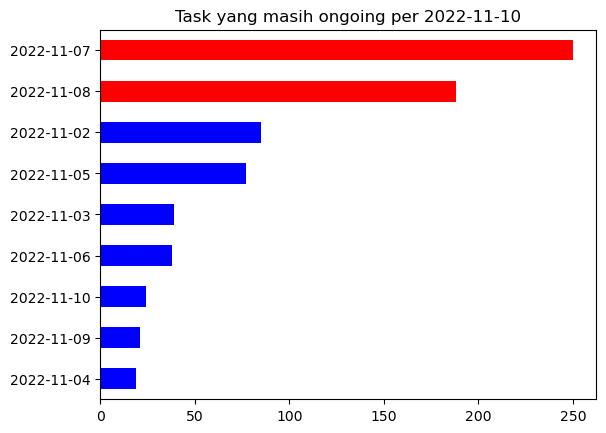

In [46]:
colors = ['blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
result.taskCreatedTime.dt.date[result.taskStatus == 'ongoing'].value_counts().sort_values(ascending = True).tail(9).plot.barh(color=colors)
date_today = result['taskCreatedTime'].max().date()
plt.title(f'Task yang masih ongoing per {date_today}')
plt.show()

jika dilihat kenbayakan lokasi yang telat/ongoing di tanggal 7 November 2022 (yg merupakan task yang paling byk telatnya) adalah di TELUK AMBON dan KOLAKA (jika dilihat mreka ada di pulau Sulawesi yang memungkinkan paket datang terlambat karena lumayan jauh)

<AxesSubplot:>

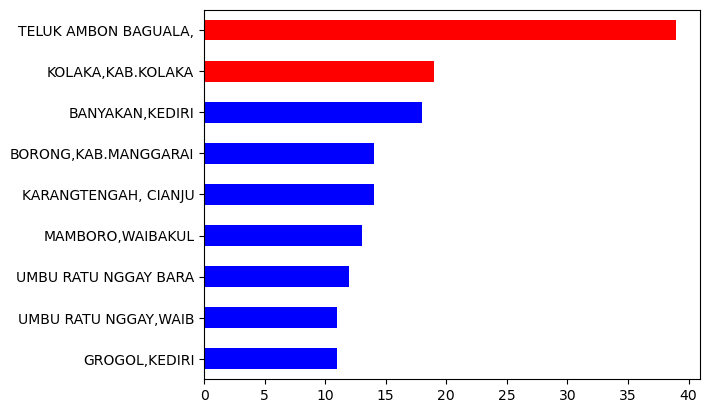

In [47]:
colors = ['blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
result.receiver_city.loc[(result.taskStatus == 'ongoing') & (result.taskCreatedTime.dt.date == datetime.date(2022, 11, 7))].value_counts().sort_values(ascending = True).tail(9).plot.barh(color=colors)

jika dilihat task2 yang masih ongoing walaupun sudah dari tanggal 4 yaitu sekitar 6 hari dikarenakan paket diantar lumayan jauh ke Papua

<AxesSubplot:>

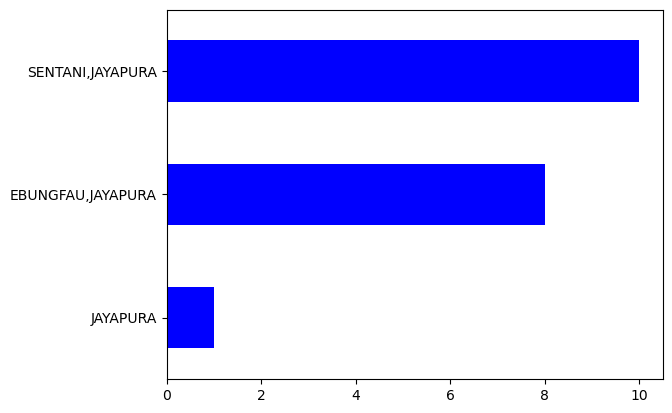

In [48]:
colors = ['blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
result.receiver_city.loc[(result.taskStatus == 'ongoing') & (result.taskCreatedTime.dt.date == datetime.date(2022, 11, 4))].value_counts().sort_values(ascending = True).tail(9).plot.barh(color=colors)

dapat disimpulkan task2 yang masih ongoing rata2 dikarenakan lokasi pengirimannya lumayan jauh

### TaskAssignedTo

kita akan check apakah pembagian task antara worker seimbang

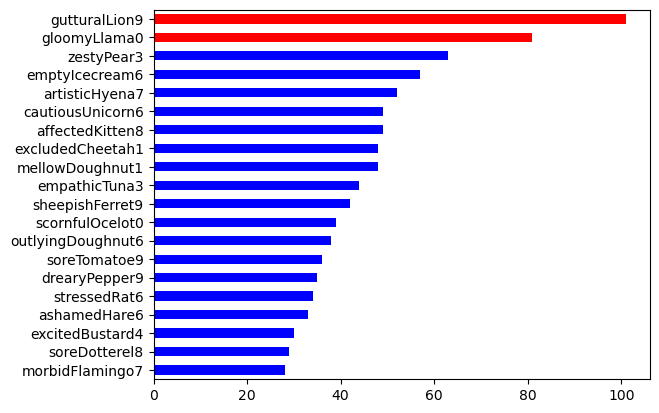

In [49]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
result['taskAssignedTo'].value_counts().sort_values(ascending = True).tail(20).plot.barh(color=colors);

jika dilihat task nya tidak seimbang karena lumayan jomplang gutturalLion9 mencapai 100 task dan morbidFlamingo di sekitar 30, maka saya akan check apa saja yang dikerjakan oleh gutturalLion9 kenapa task nya bisa jomplang

In [50]:
result[result.taskAssignedTo == 'gutturalLion9']

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,weight,branch_origin,amount,received
1520,2022-11-03 07:44:49+07:00,gutturalLion9,2022-11-03 07:47:21+07:00,done,PNK,Failed,"SUNGAI RAYA,KUBU RAY",NEW ADDRESS,0.03,CGK,74841.0,False
1521,2022-11-03 07:44:49+07:00,gutturalLion9,2022-11-03 07:47:21+07:00,done,PNK,Failed,"SUNGAI RAYA,KUBU RAY",NEW ADDRESS,0.18,CGK,131280.0,False
1522,2022-11-03 07:44:49+07:00,gutturalLion9,2022-11-03 07:47:21+07:00,done,PNK,Failed,"SUNGAI RAYA,KUBU RAY",NEW ADDRESS,0.01,CGK,43000.0,False
1524,2022-11-03 07:44:49+07:00,gutturalLion9,2022-11-03 07:47:21+07:00,done,PNK,Failed,"SUNGAI RAYA,KUBU RAY",NEW ADDRESS,0.96,CGK,NaN,NaN
1526,2022-11-03 07:44:49+07:00,gutturalLion9,2022-11-03 07:47:21+07:00,done,PNK,Failed,"SUNGAI RAYA,KUBU RAY",NEW ADDRESS,0.04,CGK,28050.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3886,2022-11-05 07:45:31+07:00,gutturalLion9,2022-11-05 07:48:44+07:00,done,PNK,Failed,"SUNGAI RAYA,KUBU RAY",NEW ADDRESS,0.2,CGK,NaN,NaN
3888,2022-11-05 07:45:31+07:00,gutturalLion9,2022-11-05 07:48:44+07:00,done,PNK,Failed,"PONTIANAK TENGGARA ,",NEW ADDRESS,1,CGK,NaN,NaN
3889,2022-11-05 07:45:31+07:00,gutturalLion9,2022-11-05 07:48:44+07:00,done,PNK,Failed,"PONTIANAK TENGGARA ,",NEW ADDRESS,1,CGK,NaN,NaN
3891,2022-11-05 07:45:31+07:00,gutturalLion9,2022-11-05 07:48:44+07:00,done,PNK,Failed,"SUNGAI RAYA,KUBU RAY",NEW ADDRESS,0.45,CGK,NaN,NaN


ternyata jika dilihat semua task yang dilakukan oleh gutturalLion9 semuanya Failed dan dengan alasan yang sama yaitu ALAMAT BARU dan bahkan tidak ada yang success sama sekali task nya

In [51]:
result[result.taskAssignedTo == 'gutturalLion9'][result.taskStatusLabel == 'Success']

C:\Users\axell\AppData\Local\Temp\ipykernel_11940\1807564546.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result[result.taskAssignedTo == 'gutturalLion9'][result.taskStatusLabel == 'Success']


,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,weight,branch_origin,amount,received


setelah dilihat kembali pembagian task kepada worker dan status nya harus success lebih masuk akal tidak terlalu jomplang

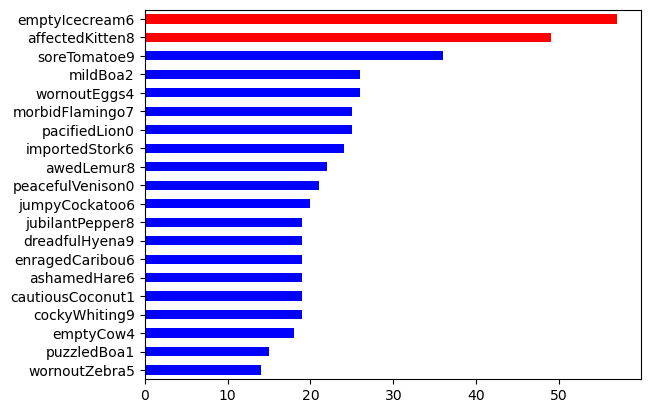

In [52]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
result.taskAssignedTo[result.taskStatusLabel == 'Success'].value_counts().sort_values(ascending = True).tail(20).plot.barh(color=colors);

### Receiver City

dapat dilihat kebanyakan kota yang task nya berhasil ada di CIDAUN, CIANJUR dan juga DENPASAR SELATAN

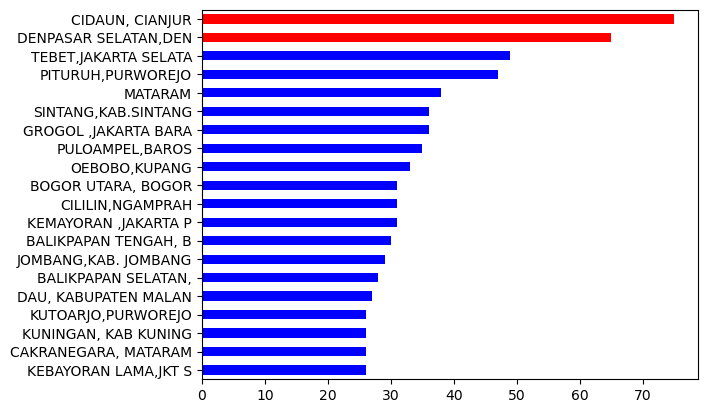

In [53]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
result['receiver_city'][result.taskStatusLabel == 'Success'].value_counts().sort_values(ascending = True).tail(20).plot.barh(color=colors);

Lalu untuk kota yang banyak gagalnya ada di SEBERANG ULU I, PALE dan SUNGAI RAYA

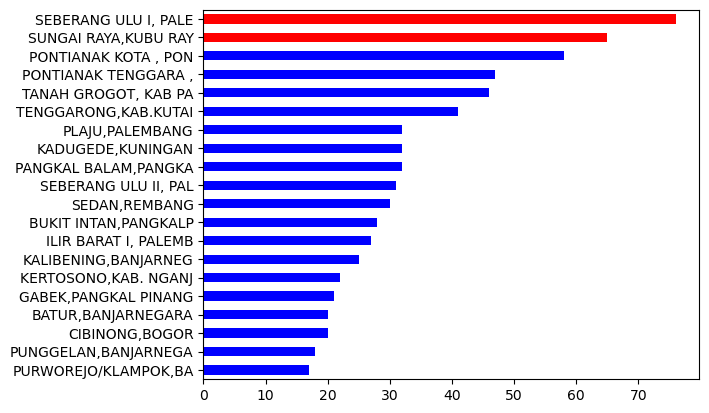

In [54]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
result['receiver_city'][result.taskStatusLabel == 'Failed'].value_counts().sort_values(ascending = True).tail(20).plot.barh(color=colors);

### taskDetailStatusLabel

Dapat dilihat untuk task yang failed rata2 dikarenakan route yang salah dan juga alamat nya tidak lengkap

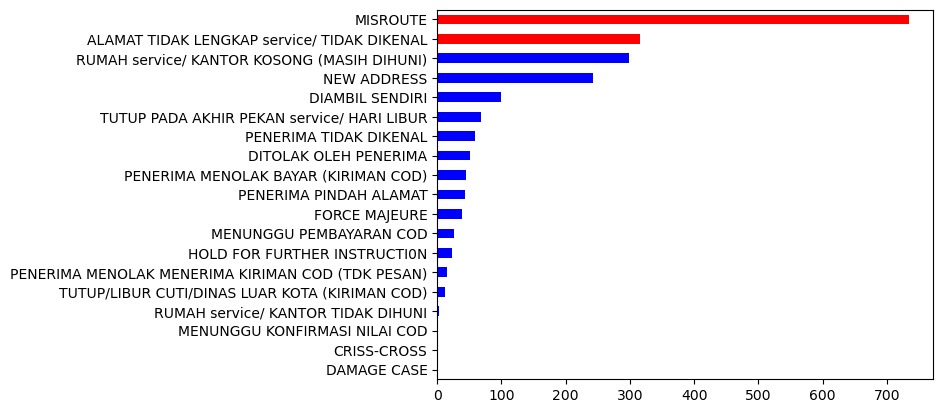

In [55]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','red','red','red']
result.taskDetailStatusLabel[result.taskStatusLabel == 'Failed'].value_counts().sort_values(ascending = True).tail(20).plot.barh(color=colors);

### Weight

dan dilihat task yang paling banyak dikerjakan rata2 berat nya sekitar 1 kg

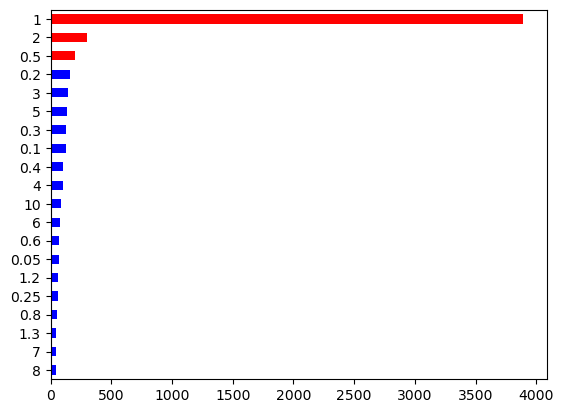

In [56]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','red','red','red']
result.weight.value_counts().sort_values(ascending = True).tail(20).plot.barh(color=colors);

### COD

dapat dilihat dari plot tersebut hampir 2/3 dari task yang melakukan cod bisa dibilang gagal / tidak diterima oleh user

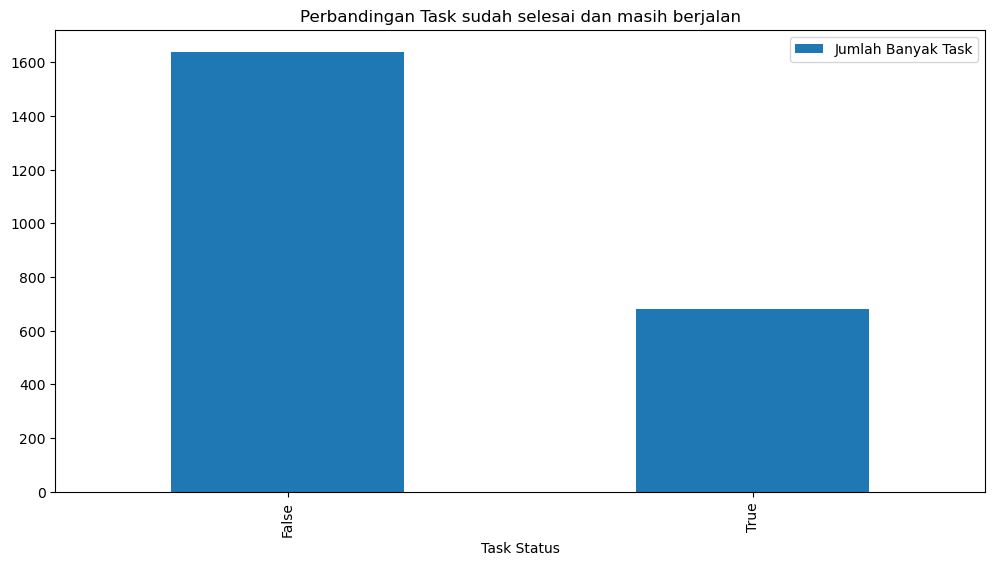

In [57]:
plt.figure(figsize=(12,6))
result['received'].value_counts().plot.bar()
plt.title('Perbandingan Task sudah selesai dan masih berjalan')
plt.xlabel('Task Status')
plt.legend(['Jumlah Banyak Task'])
plt.show()

In [58]:
result

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,weight,branch_origin,amount,received
0,2022-11-01 20:17:26+07:00,pacifiedLion0,2022-11-01 20:46:30+07:00,done,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,13,CGK,685000.0,True
1,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 12:33:48+07:00,done,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,1.3,CGK,53500.0,True
2,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 13:41:57+07:00,done,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,3,CGK,179500.0,True
3,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 18:18:19+07:00,done,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,0.625,CGK,31815.0,True
4,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 10:51:49+07:00,done,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,3,CGK,144562.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7980,2022-11-10 09:07:12+07:00,debonairPonie1,2022-11-10 09:38:04+07:00,done,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,1,CGK,NaN,NaN
7981,2022-11-10 09:21:42+07:00,murkyThrushe3,2022-11-10 09:37:52+07:00,done,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,1,TGR,NaN,NaN
7982,2022-11-10 09:36:44+07:00,enragedCake7,2022-11-10 09:37:55+07:00,done,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,1.44,CGK,NaN,NaN
7983,2022-11-10 07:25:40+07:00,lyingPaella2,2022-11-10 10:37:53+08:00,done,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,0.6,CGK,151000.0,False


## Machine Learning

In [59]:
result

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,weight,branch_origin,amount,received
0,2022-11-01 20:17:26+07:00,pacifiedLion0,2022-11-01 20:46:30+07:00,done,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,13,CGK,685000.0,True
1,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 12:33:48+07:00,done,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,1.3,CGK,53500.0,True
2,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 13:41:57+07:00,done,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,3,CGK,179500.0,True
3,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 18:18:19+07:00,done,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,0.625,CGK,31815.0,True
4,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 10:51:49+07:00,done,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,3,CGK,144562.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7980,2022-11-10 09:07:12+07:00,debonairPonie1,2022-11-10 09:38:04+07:00,done,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,1,CGK,NaN,NaN
7981,2022-11-10 09:21:42+07:00,murkyThrushe3,2022-11-10 09:37:52+07:00,done,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,1,TGR,NaN,NaN
7982,2022-11-10 09:36:44+07:00,enragedCake7,2022-11-10 09:37:55+07:00,done,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,1.44,CGK,NaN,NaN
7983,2022-11-10 07:25:40+07:00,lyingPaella2,2022-11-10 10:37:53+08:00,done,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,0.6,CGK,151000.0,False


drop column2 yang tidak diperlukan seperti berikut

In [60]:
df2 = result.drop(columns=['taskCreatedTime', 'taskCompletedTime', 'taskStatus', 'taskStatusLabel', 'taskDetailStatusLabel'])

dikarenakan saya ingin mencoba membuat model yang memprediksi apakah suatu cod berhasil direceived atau tidak maka saya harus drop data2 yang tidak ada label received nya

In [61]:
df2.isnull().sum()

taskAssignedTo       0
branch_dest          0
receiver_city        0
weight               0
branch_origin        0
amount            5664
received          5664
dtype: int64

In [62]:
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)

In [63]:
df2

,taskAssignedTo,branch_dest,receiver_city,weight,branch_origin,amount,received
0,pacifiedLion0,SRG,"BATANG ,KAB BATANG",13,CGK,685000.0,True
1,peacefulTacos6,MGL,"PURWODADI,PURWOREJO",1.3,CGK,53500.0,True
2,peacefulTacos6,MGL,"PURWODADI,PURWOREJO",3,CGK,179500.0,True
3,peacefulTacos6,MGL,"PURWODADI,PURWOREJO",0.625,CGK,31815.0,True
4,peacefulTacos6,MGL,"BAGELEN,PURWOREJO",3,CGK,144562.0,True
...,...,...,...,...,...,...,...
2316,brainyBasmati9,BOO,"CILEUNGSI,KAB.BOGOR",0.2,CGK,319000.0,False
2317,guiltyEggs0,BDJ,"TANAH SIANG,PURUKCAH",1,CGK,155000.0,False
2318,similarDunbird5,TNJ,SERI/SRI KUALA LOBAM,1,CGK,158000.0,False
2319,amusedMagpie2,BOO,"CISARUA,KAB.BOGOR",2,CGK,80499.0,False


lalu kita akan buat received sebagai label maka kita harus liat distribusi data nya

In [81]:
# plt.figure(figsize=(12,6))
# result['received'].value_counts().plot.bar()
# plt.title('Perbandingan cod berhasil dan tidak')
# plt.legend(['Jumlah Banyak Task'])
# plt.show()

### Feature Engineering

In [65]:
workers = df2.taskAssignedTo.value_counts()
workers

emptyIcecream6      57
affectedKitten8     49
excludedCheetah1    40
soreTomatoe9        36
zestyPear3          31
                    ..
chicChough2          1
kindToucan5          1
selfishTeal9         1
amazedSalt6          1
lyingPaella2         1
Name: taskAssignedTo, Length: 683, dtype: int64

jika dilihat pekerja nya lumayan banyak sekitar 2700 pekerja maka kita akan buat worker yang memiliki task < 10 akan diconvert menjadi Others

In [66]:
condition = workers[workers<10]

In [67]:
df2['taskAssignedTo'] = df2['taskAssignedTo'].apply(lambda x: "other" if x in condition else x)
df2.taskAssignedTo.value_counts()

other                1257
emptyIcecream6         57
affectedKitten8        49
excludedCheetah1       40
soreTomatoe9           36
zestyPear3             31
stressedRat6           30
excitedBustard4        29
wornoutEggs4           26
importedStork6         25
pacifiedLion0          25
sheepishFerret9        22
cautiousUnicorn6       21
empathicTuna3          21
peacefulVenison0       21
mereLocust3            20
guiltyGranola6         20
dejectedCockatoo6      20
outlyingDoughnut6      20
cockyWhiting9          19
cautiousCoconut1       19
enragedCaribou6        19
jumpyQuiche8           18
cockyOwl8              18
wornoutSnail3          18
gutturalLion9          17
scornfulOcelot0        16
jealousTruffle6        15
mellowDoughnut1        15
pacifiedWidgeon3       15
grumpyOcelot8          15
mercifulHare0          15
truthfulOrange7        15
artisticHyena7         15
eagerHeron2            14
pridefulTortoise7      14
cheerfulJaguar3        14
offendedCow8           14
ashamedHare6

untuk branch_destnya juga saya ubah yang mmemiliki data2 yang sedikit menjadi other

In [68]:
branch_dest2 = df2.branch_dest.value_counts()

In [69]:
print(branch_dest2)
condition = branch_dest2[branch_dest2<10]

SRG    229
BDO    160
KOE    160
MGL    141
KDI    110
PLM    109
CLG     91
PGK     88
SMD     71
CBN     65
DJJ     59
PNK     55
BPN     52
MJK     50
CXP     47
UPG     42
DPS     40
PKU     40
MXG     40
BOO     39
PDG     36
AMQ     35
SUB     32
TIM     32
PLW     31
TGL     30
DTB     29
GTO     28
TTE     28
AMI     27
BKS     26
MDN     25
MES     24
BTJ     24
JOG     23
TKG     19
SOQ     19
TRK     16
MDC     15
PWT     13
BDJ     13
BTH     13
MKQ     12
SOC     12
JBR     11
PSR     10
KDR      8
SMI      6
DJB      6
TGR      5
PKY      5
CKR      4
BTG      3
BKI      3
DPK      2
CGK      2
TJQ      2
TNJ      2
KRW      1
TSM      1
Name: branch_dest, dtype: int64


In [70]:
df2['branch_dest'] = df2['branch_dest'].apply(lambda x: "other" if x in condition else x)
df2.branch_dest.value_counts()

SRG      229
KOE      160
BDO      160
MGL      141
KDI      110
PLM      109
CLG       91
PGK       88
SMD       71
CBN       65
DJJ       59
PNK       55
BPN       52
other     50
MJK       50
CXP       47
UPG       42
PKU       40
DPS       40
MXG       40
BOO       39
PDG       36
AMQ       35
TIM       32
SUB       32
PLW       31
TGL       30
DTB       29
GTO       28
TTE       28
AMI       27
BKS       26
MDN       25
MES       24
BTJ       24
JOG       23
SOQ       19
TKG       19
TRK       16
MDC       15
BDJ       13
PWT       13
BTH       13
MKQ       12
SOC       12
JBR       11
PSR       10
Name: branch_dest, dtype: int64

dapat dilihat sekarang sisa 47 unique data untuk branch_dest

In [73]:
df2.branch_dest.nunique()

47

In [74]:
df2

,taskAssignedTo,branch_dest,receiver_city,weight,branch_origin,amount,received
0,pacifiedLion0,SRG,"BATANG ,KAB BATANG",13,CGK,685000.0,True
1,other,MGL,"PURWODADI,PURWOREJO",1.3,CGK,53500.0,True
2,other,MGL,"PURWODADI,PURWOREJO",3,CGK,179500.0,True
3,other,MGL,"PURWODADI,PURWOREJO",0.625,CGK,31815.0,True
4,other,MGL,"BAGELEN,PURWOREJO",3,CGK,144562.0,True
...,...,...,...,...,...,...,...
2316,other,BOO,"CILEUNGSI,KAB.BOGOR",0.2,CGK,319000.0,False
2317,other,BDJ,"TANAH SIANG,PURUKCAH",1,CGK,155000.0,False
2318,other,other,SERI/SRI KUALA LOBAM,1,CGK,158000.0,False
2319,other,BOO,"CISARUA,KAB.BOGOR",2,CGK,80499.0,False


untuk receiver city nya juga nunique nya sangat banyak sehingga saya ubah yang sedikit menjadi others

In [76]:
receiver_city = df2.receiver_city.value_counts()
receiver_city

CIDAUN, CIANJUR         73
PITURUH,PURWOREJO       47
PULOAMPEL,BAROS         35
CILILIN,NGAMPRAH        31
KADUGEDE,KUNINGAN       29
                        ..
TAYU,PATI                1
GUGUK PANJANG,BUKITT     1
KERITANG,TEMBILAHAN      1
SLAWI,KAB.TEGAL          1
CISARUA,KAB.BOGOR        1
Name: receiver_city, Length: 694, dtype: int64

In [77]:
condition = receiver_city[receiver_city<10]
df2['receiver_city'] = df2['receiver_city'].apply(lambda x: "other" if x in condition else x)
df2.receiver_city.value_counts()

other                   1341
CIDAUN, CIANJUR           73
PITURUH,PURWOREJO         47
PULOAMPEL,BAROS           35
CILILIN,NGAMPRAH          31
SEDAN,REMBANG             29
KADUGEDE,KUNINGAN         29
KUTOARJO,PURWOREJO        27
DAU, KABUPATEN MALAN      27
WANAREJA,CILACAP          27
TANAH GROGOT, KAB PA      26
BATANG ,KAB BATANG        25
KALIBENING,BANJARNEG      24
SEBERANG ULU I, PALE      21
SOBANG ,RANGKASBITUN      21
TELUK AMBON BAGUALA,      21
LEPAR PONGOK,BANGKA       19
TENGGARONG,KAB.KUTAI      19
KALORAN,TEMANGGUNG        19
KULISUSU,RAHA             18
BATUR,BANJARNEGARA        18
PANGKAL BALAM,PANGKA      18
PUNGGELAN,BANJARNEGA      17
SUNGAI RAYA,KUBU RAY      16
KOLAKA,KAB.KOLAKA         16
ANGATA,ANDOLO             16
PURWOREJO/KLAMPOK,BA      15
TERNATE SELATAN,TERN      15
RAWAS ILIR,MUARA BEL      15
BORONG,KAB.MANGGARAI      15
KERTOSONO,KAB. NGANJ      15
MANDIRAJA,BANJARNEGA      15
KOMODO,LABUAN BAJO        14
KUTA SELATAN,BADUNG       14
NARINGGUL, CIA

In [78]:
df2.receiver_city.nunique()

53

dan yang terakhir untuk branch_originnya hanya 17 nunique sehingga saya tidak melakukan perubahan 

In [80]:
branch_origin = df2.branch_origin.value_counts()
branch_origin.nunique()

17

### Preprocessing

In [82]:
df2

,taskAssignedTo,branch_dest,receiver_city,weight,branch_origin,amount,received
0,pacifiedLion0,SRG,"BATANG ,KAB BATANG",13,CGK,685000.0,True
1,other,MGL,other,1.3,CGK,53500.0,True
2,other,MGL,other,3,CGK,179500.0,True
3,other,MGL,other,0.625,CGK,31815.0,True
4,other,MGL,other,3,CGK,144562.0,True
...,...,...,...,...,...,...,...
2316,other,BOO,other,0.2,CGK,319000.0,False
2317,other,BDJ,other,1,CGK,155000.0,False
2318,other,other,other,1,CGK,158000.0,False
2319,other,BOO,other,2,CGK,80499.0,False


lalu saya ubah column2 yang masih bukan int/float menjadi dummies

In [84]:
dummies=pd.get_dummies(df2[['taskAssignedTo', 'branch_dest', 'receiver_city', 'branch_origin']])
dummies.head()

,taskAssignedTo_affectedKitten8,taskAssignedTo_amazedCheetah3,taskAssignedTo_artisticHyena7,taskAssignedTo_ashamedHare6,taskAssignedTo_betrayedFalcon8,taskAssignedTo_cautiousCoconut1,taskAssignedTo_cautiousUnicorn6,taskAssignedTo_cheerfulJaguar3,taskAssignedTo_chicApples6,taskAssignedTo_cockyOwl8,...,branch_origin_PWT,branch_origin_SMI,branch_origin_SOC,branch_origin_SRG,branch_origin_SUB,branch_origin_TGL,branch_origin_TGR,branch_origin_TKG,branch_origin_TSM,branch_origin_UPG
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


lalu saya buang column2 yang telah diubah menjadi dummy agar tidak dobel

In [89]:
temp_df = df2.drop(columns=['taskAssignedTo', 'branch_dest', 'receiver_city', 'branch_origin'])
temp_df

,weight,amount,received
0,13,685000.0,True
1,1.3,53500.0,True
2,3,179500.0,True
3,0.625,31815.0,True
4,3,144562.0,True
...,...,...,...
2316,0.2,319000.0,False
2317,1,155000.0,False
2318,1,158000.0,False
2319,2,80499.0,False


lalu saya menggabungkan feature yang diperlukan

In [92]:
feature = pd.concat([temp_df, dummies], axis = 1)

dan di sini saya memisahkan label/target yang menjadi prediksi nanti

In [94]:
feature = feature.drop(columns=['received'])
target = temp_df['received']

jika dilihat shapenya masih setara

In [97]:
print(feature.shape)
print(target.shape)

(2321, 193)
(2321,)


lalu saya melakukan preprocessing standardscaler untuk feature dan label encoding untuk targetnya

In [125]:
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

scaler = StandardScaler()
feature = scaler.fit_transform(feature)

le = LabelEncoder()
target = le.fit_transform(target)

lalu saya memisahkan training sebesar 80% dan testing 20%

In [126]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature,target,test_size=0.2,random_state=42)

### Building Models

di sini saya menggunakan 3 model dasar untuk classification untuk mengecek seberapa baik model2 tersebut dalam mengklasifikasi

#### 1. Decision Tree 

In [131]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)
print(classification_report(y_test,y_pred))
decision_tree.score(x_test, y_test)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       319
           1       0.88      0.80      0.84       146

    accuracy                           0.90       465
   macro avg       0.90      0.88      0.88       465
weighted avg       0.90      0.90      0.90       465



0.9032258064516129

di sini saya tidak mengubah parameter apa2 terhadap modelnya dan mendapatkan accuracy sekitar 90%

#### 2. Support Vector Machine

In [132]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train,y_train)

y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       319
           1       0.94      0.79      0.86       146

    accuracy                           0.92       465
   macro avg       0.93      0.88      0.90       465
weighted avg       0.92      0.92      0.92       465



pada SVM juga dapat dilihat kita mendapatkan accuracy 92%

#### 3. XGBoostClassifier

In [146]:
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [149]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       319
           1       0.92      0.84      0.88       146

    accuracy                           0.93       465
   macro avg       0.93      0.90      0.91       465
weighted avg       0.93      0.93      0.93       465



dan yang terakhir untuk xgboost memiliki accuracy testing sebesar 93%

## Kesimpulan

untuk kesimpulannya saya tidak melakukan banyak terhadap perlakuan machine learning seperti fine tuning dan lainnya dikarenakan data yang dimiliki sekarang dapat saya asumsikan hanya sample dan memiliki beberapa anomali seperti sekitar 100 task yang dikerjakan oleh 1 orang semuanya failed dan lainnya.